In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zaytsevpavel1376","key":"262da53e6f5a27cf57b511695d855fd4"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d waleedejaz/predict-students-dropout-and-academic-success

Dataset URL: https://www.kaggle.com/datasets/waleedejaz/predict-students-dropout-and-academic-success
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/105k [00:00<?, ?B/s]
100% 105k/105k [00:00<00:00, 41.0MB/s]


In [5]:
! unzip  '/content/predict-students-dropout-and-academic-success.zip' -d '/content/predict-students-dropout-and-academic-success'

Archive:  /content/predict-students-dropout-and-academic-success.zip
  inflating: /content/predict-students-dropout-and-academic-success/data.csv  


In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
start_data = pd.read_csv('/content/predict-students-dropout-and-academic-success/data.csv', sep=';')
start_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Анализ предметной области

## О датасете
Набор данных был создан в рамках проекта, целью которого является содействие сокращению отсева и неудач в высшем образовании за счет использования методов машинного обучения для выявления студентов, подвергающихся риску, на раннем этапе их академического пути, чтобы можно было разработать стратегии их поддержки. поставить на место.

Набор данных включает в себя информацию, известную на момент зачисления студентов – академический путь, демографические и социально-экономические факторы.

Задача формулируется как задача классификации трех категорий (отсев, зачислен и выпускник) в конце обычной продолжительности курса.

Файл Data.csv содержит 36 функций и один целевой столбец. Задача формулируется с помощью Target как задача классификации трех категорий, в которой наблюдается сильный дисбаланс в сторону одного из классов.
Была выполнена тщательная предварительная обработка данных для устранения аномалий, необъяснимых выбросов и пропущенных значений.

## Информация о признаках

In [8]:
print("Кол-во уникальных значений")
print(start_data.nunique(), '\n')

print("Типы переменных о датафрейме, кол-во пропущенных значений")
print(start_data.info())

Кол-во уникальных значений
Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
S

In [9]:
categ_col_unorder = ['Marital status', 'Application mode', 'Nacionality',
             'Previous qualification', "Mother's qualification",
             "Father's qualification", "Mother's occupation", "Father's occupation",
             'Displaced', 'Educational special needs', 'Debtor',
             'Tuition fees up to date', 'Gender', 'Scholarship holder',
             'Daytime/evening attendance\t', 'International']



# Предобработка данных

## Кодирование категориальных переменных

In [10]:
from sklearn.preprocessing import StandardScaler
from  sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = start_data.copy()
oneHotEncode = OneHotEncoder()
data_categ_encode = pd.DataFrame(oneHotEncode.fit_transform(data[categ_col_unorder]).toarray(), columns = oneHotEncode.get_feature_names_out())

data_categ_encode

,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,...,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,Daytime/evening attendance\t_0,Daytime/evening attendance\t_1,International_0,International_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4420,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4421,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4422,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## Анализ непрерывных данных

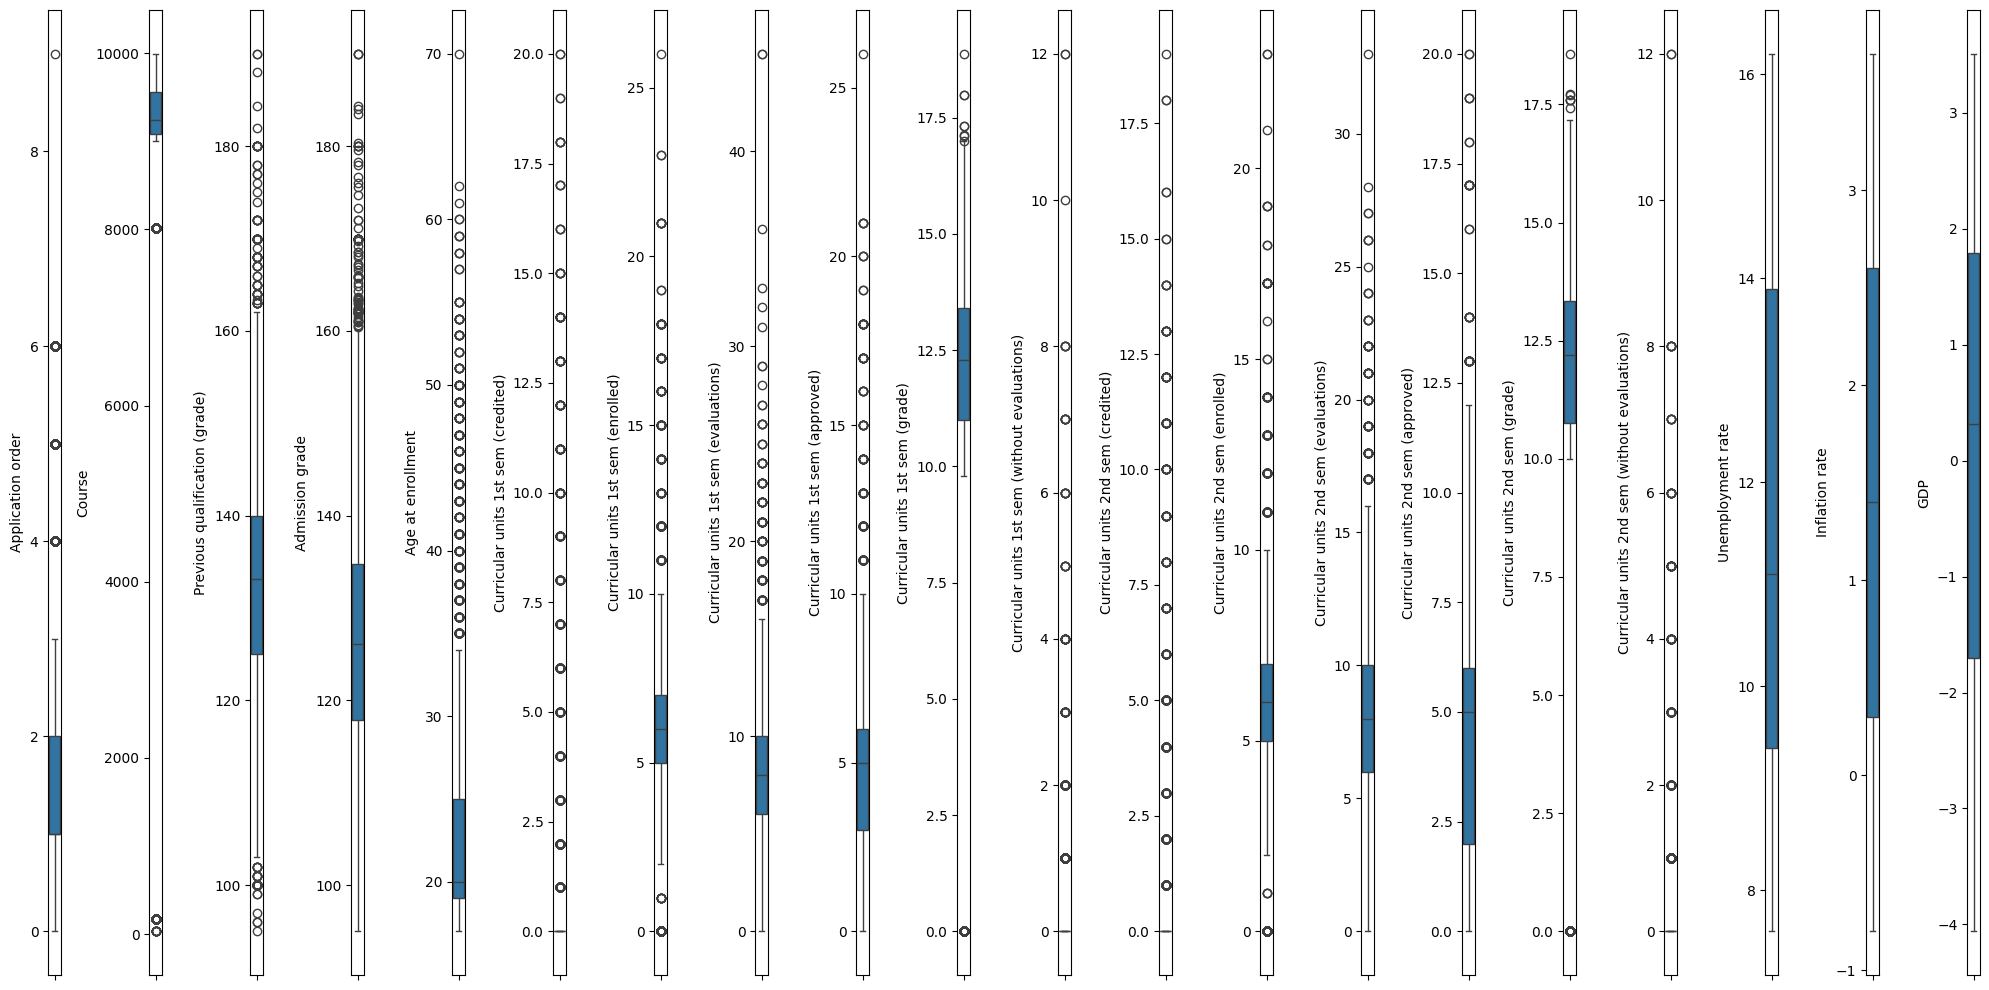

In [11]:
import seaborn as sns

encoder = LabelEncoder()
y = pd.DataFrame(encoder.fit(data['Target']).transform(data['Target']), columns=['Target'])

data_cont = data.drop(categ_col_unorder, axis=1)
data_cont.drop(['Target'], axis=1, inplace=True)

fig = plt.figure(figsize=(20, 10))
for ind, col in enumerate(data_cont.columns):
  ax = fig.add_subplot(1, len(data_cont.columns), ind+1)
  sns.boxplot(data_cont[col], ax=ax)

fig.tight_layout()

### По графику видно, что данные имеют много выбросов. => лучше делать нормировку по квартилям.

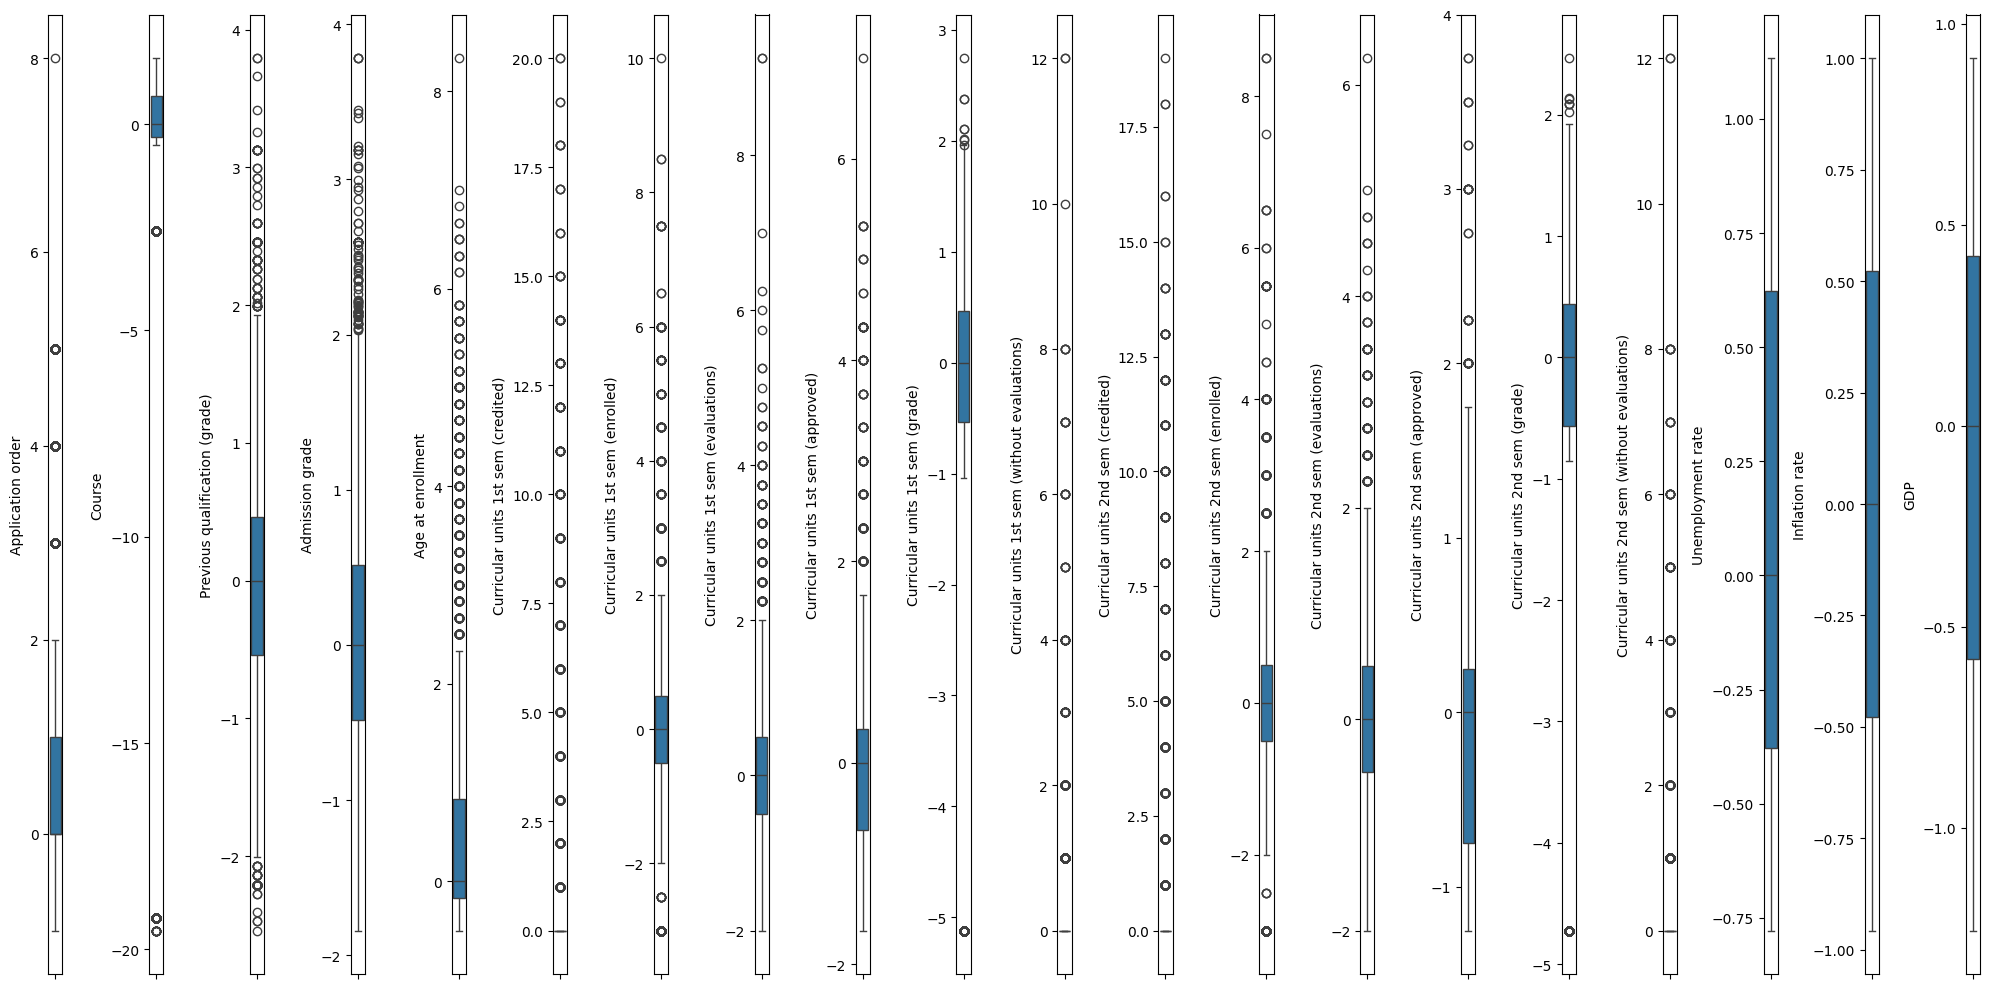

In [12]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_cont_sd = pd.DataFrame(scaler.fit(data_cont).transform(data_cont), columns=scaler.get_feature_names_out())

fig = plt.figure(figsize=(20, 10))
for ind, col in enumerate(data_cont_sd.columns):
  ax = fig.add_subplot(1, len(data_cont_sd.columns), ind+1)
  sns.boxplot(data_cont_sd[col], ax=ax)

fig.tight_layout()


In [13]:
corr = data_cont_sd.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '12pt'})\
    .set_caption("Корреляция непрерывных признаков")\
    .set_table_styles(magnify())

,Application order,Course,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Application order,1.000,0.060,-0.064,-0.097,-0.271,-0.133,-0.017,-0.092,0.036,0.058,-0.032,-0.126,0.029,-0.055,0.072,0.056,-0.016,-0.098,-0.011,0.030
Course,0.060,1.000,-0.081,-0.125,0.043,-0.096,0.328,0.273,0.180,0.389,0.035,-0.090,0.402,0.279,0.198,0.349,0.031,0.007,0.018,-0.020
Previous qualification (grade),-0.064,-0.081,1.000,0.580,-0.111,-0.009,-0.029,-0.071,0.048,0.059,-0.004,-0.018,-0.032,-0.061,0.050,0.053,-0.019,0.045,0.019,-0.053
Admission grade,-0.097,-0.125,0.580,1.000,-0.030,0.041,-0.033,-0.072,0.071,0.074,0.009,0.040,-0.042,-0.057,0.077,0.074,-0.013,0.039,-0.022,-0.020
Age at enrollment,-0.271,0.043,-0.111,-0.030,1.000,0.227,0.141,0.140,-0.053,-0.157,0.057,0.208,0.086,0.056,-0.112,-0.173,0.062,0.025,0.025,-0.065
Curricular units 1st sem (credited),-0.133,-0.096,-0.009,0.041,0.227,1.000,0.774,0.543,0.628,0.123,0.116,0.945,0.645,0.428,0.490,0.133,0.055,0.010,0.023,-0.027
Curricular units 1st sem (enrolled),-0.017,0.328,-0.029,-0.033,0.141,0.774,1.000,0.680,0.769,0.377,0.129,0.754,0.943,0.600,0.673,0.362,0.070,0.038,0.037,-0.026
Curricular units 1st sem (evaluations),-0.092,0.273,-0.071,-0.072,0.140,0.543,0.680,1.000,0.522,0.418,0.242,0.522,0.612,0.779,0.442,0.355,0.134,0.062,-0.007,-0.100
Curricular units 1st sem (approved),0.036,0.180,0.048,0.071,-0.053,0.628,0.769,0.522,1.000,0.696,-0.013,0.608,0.734,0.540,0.904,0.686,-0.054,0.051,-0.007,0.018
Curricular units 1st sem (grade),0.058,0.389,0.059,0.074,-0.157,0.123,0.377,0.418,0.696,1.000,-0.072,0.114,0.406,0.487,0.673,0.837,-0.066,0.015,-0.034,0.055


### Видно, что данные об учебной программе сильно коррелируют между собой.Применим метод PCA, чтобы уменьшить количество атрибутов

In [14]:
from sklearn.decomposition import PCA

data_cont_pca = data_cont_sd.copy()

n_features_rsa = len(data_cont_pca.columns) - 7
pca = PCA(n_components=n_features_rsa)
pca.fit(data_cont_pca)
print(pca.explained_variance_ratio_)
data_cont_pca = pd.DataFrame(pca.transform(data_cont_pca))

[0.43721925 0.25424636 0.11833938 0.03925007 0.02559591 0.02198418
 0.01999303 0.01434659 0.01229599 0.01076538 0.00999902 0.00737553
 0.00617948]


### Вклад оставшихся атрибутов в общий разброс данных больше 99.9 %

In [15]:
X = pd.concat([data_cont_pca, data_categ_encode], axis=1)
#X_features, y.features = X.columns, y.columns
pd.concat([X, y], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,Daytime/evening attendance\t_0,Daytime/evening attendance\t_1,International_0,International_1,Target
0,20.069965,-0.236144,-1.579128,3.032439,1.429914,-1.235897,0.320012,0.287265,0.659174,-0.634750,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,-1.283076,-0.514906,-2.022310,-0.770913,-2.062218,-0.298711,0.386073,0.008767,0.024884,0.308536,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2
2,2.268235,-3.690073,4.631256,4.117932,-0.415208,-1.417501,-0.306056,0.338270,-0.002503,0.229631,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0
3,-2.291774,-0.813567,-1.073345,0.293432,0.550831,0.302765,-0.473192,-0.099362,0.283200,0.099138,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2
4,1.221819,0.255382,-1.038936,-2.652887,2.595609,-2.027723,0.398523,0.403635,-0.380886,0.574720,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-2.304998,-1.145328,-1.473149,3.550073,1.105920,-1.163314,0.972615,-0.207359,0.168241,0.404347,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2
4420,-1.821055,-1.364242,-0.382023,0.667358,0.068464,-0.046035,-1.142583,-0.003448,0.653965,0.110469,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
4421,-2.094634,-0.058911,-1.437043,-1.678198,-0.839394,-0.719648,1.471005,-0.581107,-0.401310,0.366924,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
4422,-0.674994,-0.947075,-1.713351,-1.033594,-3.056321,-0.548169,1.457480,-0.218779,0.484289,-0.032305,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2


In [16]:
X1 = X.copy()
y1 = y.copy()
X = X.values
y = y.Target.values

In [17]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1, 2], y=y)
class_weights

array([1.03776683, 1.8572628 , 0.66757205])

In [18]:
class_weights = np.array([x for x in class_weights], dtype=np.float32)
type(class_weights[0])

numpy.float32

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_dum, y_train, y_dum=train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test= train_test_split(X_dum, y_dum ,test_size=0.5)

In [20]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as T

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # вычисления на графическом процессоре, если возможно
device

'cpu'

In [22]:
class MyDataset(Dataset):
  def __init__(self, data, targets, transform=None):
      self.data = torch.Tensor(data)
      self.targets = torch.LongTensor(targets)
      self.transform = transform

  def __getitem__(self, index):
      x = self.data[index]
      y = self.targets[index]
      return x, y

  def get_labels(self):
    return self.targets

  def __len__(self):
      return len(self.data)

In [23]:
train_dataset=MyDataset(X_train,y_train)
val_dataset=MyDataset(X_val,y_val)
test_dataset=MyDataset(X_test,y_test)

In [24]:
print(f'''Длина тестовой выборки: {len(test_dataset)}
Длина валидационной выборки: {len(val_dataset)}
Длина тренировочной выборки: {len(train_dataset)}''')

Длина тестовой выборки: 664
Длина валидационной выборки: 664
Длина тренировочной выборки: 3096


In [25]:
!pip install torchsampler

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [26]:
from torchsampler import ImbalancedDatasetSampler

In [27]:
batch_size=16 # размер пакета
train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle=False,
                          sampler=ImbalancedDatasetSampler(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

In [28]:
class Classification_Model_FFNN(nn.Module):
  def __init__(self, num_inputs, num_classes):
      super(Classification_Model_FFNN, self).__init__()
      self.pipe = nn.Sequential(
          nn.Linear(num_inputs, 128, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(128),

          nn.Linear(128, 128, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(128),

          nn.Linear(128, 128, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(128),

          nn.Linear(128, 64, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(64),

          nn.Linear(64, num_classes))

  def forward(self, x):
      return self.pipe(x)

In [29]:
model=Classification_Model_FFNN(len(X[0]), len(set(y)))
model.to(device);

In [30]:
! pip install torchinfo

In [31]:
from torchinfo import summary
summary(model,input_size=(1, len(X[0])))

Layer (type:depth-idx)                   Output Shape              Param #
Classification_Model_FFNN                [1, 3]                    --
├─Sequential: 1-1                        [1, 3]                    --
│    └─Linear: 2-1                       [1, 128]                  29,696
│    └─ReLU6: 2-2                        [1, 128]                  --
│    └─BatchNorm1d: 2-3                  [1, 128]                  256
│    └─Linear: 2-4                       [1, 128]                  16,384
│    └─ReLU6: 2-5                        [1, 128]                  --
│    └─BatchNorm1d: 2-6                  [1, 128]                  256
│    └─Linear: 2-7                       [1, 128]                  16,384
│    └─ReLU6: 2-8                        [1, 128]                  --
│    └─BatchNorm1d: 2-9                  [1, 128]                  256
│    └─Linear: 2-10                      [1, 64]                   8,192
│    └─ReLU6: 2-11                       [1, 64]                   

In [32]:
criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights))
#criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=0.1)

In [33]:
from tqdm import tqdm

In [34]:
def accuracy(predictions, labels):
    classes = torch.argmax(predictions, dim=1)
    return torch.mean((classes == labels).float())

In [35]:
train_losses=[]
train_accs=[]
def train(model,epoch):
  print('\nEpoch : %d'%epoch)
  model.train() # веса модели можно обновлять
  running_loss= 0.
  running_acc = 0.
  for data in tqdm(train_loader):
      inputs, targets=data[0].to(device),data[1].to(device) # распаковываем пакеты
      optimizer.zero_grad() # обнуляем градиенты
      outputs=model(inputs) # считаем предсказания - прямой проход модели
      loss=criterion(outputs,targets) # ошибка пакета
      loss.backward() # обратное распространение ошибки
      optimizer.step() # итерация алгоритма оптимизации

      running_loss += loss.item()
      running_acc += accuracy(outputs,targets)

  train_loss=running_loss/len(train_loader)
  train_acc=running_acc/len(train_loader)

  train_losses.append(train_loss)
  train_accs.append(train_acc)
  print('Средняя ошибка модели на тренировочной выборке: %.4f'%(train_loss)+'   Средняя точность модели на тренировочной выборке: %.4f'%(train_acc))

In [36]:
val_losses=[]
val_accs=[]
def val(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval() # веса модели заморожены
    running_loss = 0.
    running_acc = 0.
    with torch.no_grad(): # запрещаем переисывать градиенты
        for data in tqdm(val_loader):
            inputs, targets=data[0].to(device),data[1].to(device)
            outputs=model(inputs)
            loss=criterion(outputs,targets)

            running_loss += loss.item()
            running_acc += accuracy(outputs,targets)

        val_loss=running_loss/len(val_loader)
        val_acc=running_acc/len(val_loader)

        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print('Средняя ошибка модели на валидационной выборке: %.4f'%(val_loss)+'   Средняя точность модели на валидационной выборке: %.4f'%(val_acc))

In [37]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [38]:
max_epochs=100
best_acc=0.0
early_stopper = EarlyStopper(patience=5, min_delta=0.1)
for epoch in range(1,max_epochs+1):
    train(model,epoch)
    val(model,epoch)
    if val_accs[-1] > best_acc:
       torch.save(model, 'best-model.pt')
       best_acc = val_accs[-1]
    if early_stopper.early_stop(val_losses[-1]):
      break


Epoch : 1


100%|██████████| 194/194 [00:01<00:00, 142.58it/s]


Средняя ошибка модели на тренировочной выборке: 0.8111   Средняя точность модели на тренировочной выборке: 0.6231

Epoch : 1


100%|██████████| 42/42 [00:00<00:00, 1380.80it/s]


Средняя ошибка модели на валидационной выборке: 0.8844   Средняя точность модели на валидационной выборке: 0.5506

Epoch : 2


100%|██████████| 194/194 [00:01<00:00, 123.66it/s]


Средняя ошибка модели на тренировочной выборке: 0.7629   Средняя точность модели на тренировочной выборке: 0.6405

Epoch : 2


100%|██████████| 42/42 [00:00<00:00, 381.82it/s]


Средняя ошибка модели на валидационной выборке: 0.8750   Средняя точность модели на валидационной выборке: 0.5789

Epoch : 3


100%|██████████| 194/194 [00:03<00:00, 55.67it/s]


Средняя ошибка модели на тренировочной выборке: 0.7376   Средняя точность модели на тренировочной выборке: 0.6546

Epoch : 3


100%|██████████| 42/42 [00:00<00:00, 472.06it/s]


Средняя ошибка модели на валидационной выборке: 0.8396   Средняя точность модели на валидационной выборке: 0.5967

Epoch : 4


100%|██████████| 194/194 [00:01<00:00, 114.25it/s]


Средняя ошибка модели на тренировочной выборке: 0.7300   Средняя точность модели на тренировочной выборке: 0.6598

Epoch : 4


100%|██████████| 42/42 [00:00<00:00, 901.48it/s]


Средняя ошибка модели на валидационной выборке: 0.8789   Средняя точность модели на валидационной выборке: 0.4643

Epoch : 5


100%|██████████| 194/194 [00:01<00:00, 113.34it/s]


Средняя ошибка модели на тренировочной выборке: 0.7376   Средняя точность модели на тренировочной выборке: 0.6492

Epoch : 5


100%|██████████| 42/42 [00:00<00:00, 689.88it/s]


Средняя ошибка модели на валидационной выборке: 0.8050   Средняя точность модели на валидационной выборке: 0.5818

Epoch : 6


100%|██████████| 194/194 [00:01<00:00, 119.41it/s]


Средняя ошибка модели на тренировочной выборке: 0.7619   Средняя точность модели на тренировочной выборке: 0.6408

Epoch : 6


100%|██████████| 42/42 [00:00<00:00, 556.12it/s]


Средняя ошибка модели на валидационной выборке: 0.8769   Средняя точность модели на валидационной выборке: 0.5655

Epoch : 7


100%|██████████| 194/194 [00:01<00:00, 107.15it/s]


Средняя ошибка модели на тренировочной выборке: 0.7881   Средняя точность модели на тренировочной выборке: 0.6372

Epoch : 7


100%|██████████| 42/42 [00:00<00:00, 891.58it/s]


Средняя ошибка модели на валидационной выборке: 0.9340   Средняя точность модели на валидационной выборке: 0.4271

Epoch : 8


100%|██████████| 194/194 [00:02<00:00, 79.34it/s] 


Средняя ошибка модели на тренировочной выборке: 0.7875   Средняя точность модели на тренировочной выборке: 0.6363

Epoch : 8


100%|██████████| 42/42 [00:00<00:00, 147.36it/s]


Средняя ошибка модели на валидационной выборке: 0.8910   Средняя точность модели на валидационной выборке: 0.5685

Epoch : 9


100%|██████████| 194/194 [00:04<00:00, 40.89it/s]


Средняя ошибка модели на тренировочной выборке: 0.7891   Средняя точность модели на тренировочной выборке: 0.6202

Epoch : 9


100%|██████████| 42/42 [00:00<00:00, 323.33it/s]


Средняя ошибка модели на валидационной выборке: 0.9053   Средняя точность модели на валидационной выборке: 0.5565

Epoch : 10


100%|██████████| 194/194 [00:02<00:00, 86.83it/s]


Средняя ошибка модели на тренировочной выборке: 0.8176   Средняя точность модели на тренировочной выборке: 0.6018

Epoch : 10


100%|██████████| 42/42 [00:00<00:00, 336.94it/s]


Средняя ошибка модели на валидационной выборке: 0.9164   Средняя точность модели на валидационной выборке: 0.4658

Epoch : 11


100%|██████████| 194/194 [00:02<00:00, 70.82it/s]


Средняя ошибка модели на тренировочной выборке: 0.7797   Средняя точность модели на тренировочной выборке: 0.6266

Epoch : 11


100%|██████████| 42/42 [00:00<00:00, 338.74it/s]


Средняя ошибка модели на валидационной выборке: 0.8563   Средняя точность модели на валидационной выборке: 0.5759

Epoch : 12


100%|██████████| 194/194 [00:02<00:00, 95.72it/s] 


Средняя ошибка модели на тренировочной выборке: 0.7847   Средняя точность модели на тренировочной выборке: 0.6195

Epoch : 12


100%|██████████| 42/42 [00:00<00:00, 621.87it/s]


Средняя ошибка модели на валидационной выборке: 0.9250   Средняя точность модели на валидационной выборке: 0.4851

Epoch : 13


100%|██████████| 194/194 [00:01<00:00, 97.20it/s]


Средняя ошибка модели на тренировочной выборке: 0.8013   Средняя точность модели на тренировочной выборке: 0.5983

Epoch : 13


100%|██████████| 42/42 [00:00<00:00, 248.74it/s]


Средняя ошибка модели на валидационной выборке: 0.8807   Средняя точность модели на валидационной выборке: 0.5476

Epoch : 14


100%|██████████| 194/194 [00:03<00:00, 53.74it/s]


Средняя ошибка модели на тренировочной выборке: 0.7962   Средняя точность модели на тренировочной выборке: 0.6221

Epoch : 14


100%|██████████| 42/42 [00:00<00:00, 357.62it/s]


Средняя ошибка модели на валидационной выборке: 0.8310   Средняя точность модели на валидационной выборке: 0.5804

Epoch : 15


100%|██████████| 194/194 [00:01<00:00, 105.29it/s]


Средняя ошибка модели на тренировочной выборке: 0.7603   Средняя точность модели на тренировочной выборке: 0.6440

Epoch : 15


100%|██████████| 42/42 [00:00<00:00, 972.66it/s]


Средняя ошибка модели на валидационной выборке: 0.8652   Средняя точность модели на валидационной выборке: 0.5580

Epoch : 16


100%|██████████| 194/194 [00:02<00:00, 91.25it/s] 


Средняя ошибка модели на тренировочной выборке: 0.7731   Средняя точность модели на тренировочной выборке: 0.6479

Epoch : 16


100%|██████████| 42/42 [00:00<00:00, 616.41it/s]


Средняя ошибка модели на валидационной выборке: 0.8779   Средняя точность модели на валидационной выборке: 0.5863

Epoch : 17


100%|██████████| 194/194 [00:02<00:00, 86.76it/s]


Средняя ошибка модели на тренировочной выборке: 0.7714   Средняя точность модели на тренировочной выборке: 0.6495

Epoch : 17


100%|██████████| 42/42 [00:00<00:00, 555.78it/s]


Средняя ошибка модели на валидационной выборке: 0.8622   Средняя точность модели на валидационной выборке: 0.6131

Epoch : 18


100%|██████████| 194/194 [00:02<00:00, 78.62it/s]


Средняя ошибка модели на тренировочной выборке: 0.7677   Средняя точность модели на тренировочной выборке: 0.6492

Epoch : 18


100%|██████████| 42/42 [00:00<00:00, 342.26it/s]


Средняя ошибка модели на валидационной выборке: 0.9020   Средняя точность модели на валидационной выборке: 0.5238

Epoch : 19


100%|██████████| 194/194 [00:02<00:00, 87.67it/s]


Средняя ошибка модели на тренировочной выборке: 0.7748   Средняя точность модели на тренировочной выборке: 0.6492

Epoch : 19


100%|██████████| 42/42 [00:00<00:00, 206.31it/s]


Средняя ошибка модели на валидационной выборке: 0.8678   Средняя точность модели на валидационной выборке: 0.6057

Epoch : 20


100%|██████████| 194/194 [00:02<00:00, 70.74it/s] 


Средняя ошибка модели на тренировочной выборке: 0.7841   Средняя точность модели на тренировочной выборке: 0.6250

Epoch : 20


100%|██████████| 42/42 [00:00<00:00, 797.00it/s]


Средняя ошибка модели на валидационной выборке: 0.8603   Средняя точность модели на валидационной выборке: 0.5357

Epoch : 21


100%|██████████| 194/194 [00:01<00:00, 192.17it/s]


Средняя ошибка модели на тренировочной выборке: 0.7598   Средняя точность модели на тренировочной выборке: 0.6434

Epoch : 21


100%|██████████| 42/42 [00:00<00:00, 1381.91it/s]


Средняя ошибка модели на валидационной выборке: 0.8602   Средняя точность модели на валидационной выборке: 0.5833

Epoch : 22


100%|██████████| 194/194 [00:01<00:00, 192.66it/s]


Средняя ошибка модели на тренировочной выборке: 0.7773   Средняя точность модели на тренировочной выборке: 0.6395

Epoch : 22


100%|██████████| 42/42 [00:00<00:00, 974.71it/s]


Средняя ошибка модели на валидационной выборке: 0.8610   Средняя точность модели на валидационной выборке: 0.5565

Epoch : 23


100%|██████████| 194/194 [00:00<00:00, 212.03it/s]


Средняя ошибка модели на тренировочной выборке: 0.7804   Средняя точность модели на тренировочной выборке: 0.6443

Epoch : 23


100%|██████████| 42/42 [00:00<00:00, 737.21it/s]


Средняя ошибка модели на валидационной выборке: 0.8500   Средняя точность модели на валидационной выборке: 0.6071

Epoch : 24


100%|██████████| 194/194 [00:01<00:00, 182.75it/s]


Средняя ошибка модели на тренировочной выборке: 0.7633   Средняя точность модели на тренировочной выборке: 0.6649

Epoch : 24


100%|██████████| 42/42 [00:00<00:00, 1412.44it/s]


Средняя ошибка модели на валидационной выборке: 0.8461   Средняя точность модели на валидационной выборке: 0.6429

Epoch : 25


100%|██████████| 194/194 [00:00<00:00, 195.35it/s]


Средняя ошибка модели на тренировочной выборке: 0.7413   Средняя точность модели на тренировочной выборке: 0.6714

Epoch : 25


100%|██████████| 42/42 [00:00<00:00, 1449.60it/s]


Средняя ошибка модели на валидационной выборке: 0.8820   Средняя точность модели на валидационной выборке: 0.5848

Epoch : 26


100%|██████████| 194/194 [00:01<00:00, 190.62it/s]


Средняя ошибка модели на тренировочной выборке: 0.7590   Средняя точность модели на тренировочной выборке: 0.6611

Epoch : 26


100%|██████████| 42/42 [00:00<00:00, 1434.90it/s]


Средняя ошибка модели на валидационной выборке: 0.8547   Средняя точность модели на валидационной выборке: 0.5967

Epoch : 27


100%|██████████| 194/194 [00:01<00:00, 183.79it/s]


Средняя ошибка модели на тренировочной выборке: 0.7416   Средняя точность модели на тренировочной выборке: 0.6814

Epoch : 27


100%|██████████| 42/42 [00:00<00:00, 1442.68it/s]


Средняя ошибка модели на валидационной выборке: 0.8243   Средняя точность модели на валидационной выборке: 0.6220

Epoch : 28


100%|██████████| 194/194 [00:01<00:00, 187.12it/s]


Средняя ошибка модели на тренировочной выборке: 0.7532   Средняя точность модели на тренировочной выборке: 0.6575

Epoch : 28


100%|██████████| 42/42 [00:00<00:00, 1245.21it/s]

Средняя ошибка модели на валидационной выборке: 0.9219   Средняя точность модели на валидационной выборке: 0.4911


In [39]:
best_acc

tensor(0.6429)

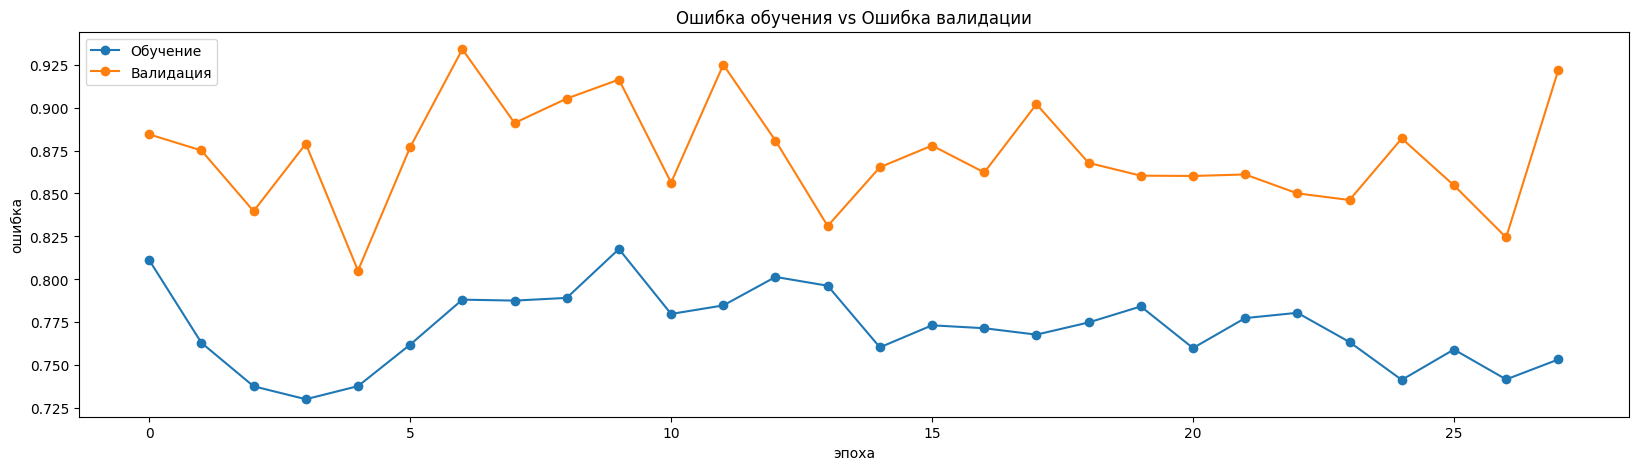

In [40]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('эпоха')
plt.ylabel('ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения vs Ошибка валидации')
plt.show()

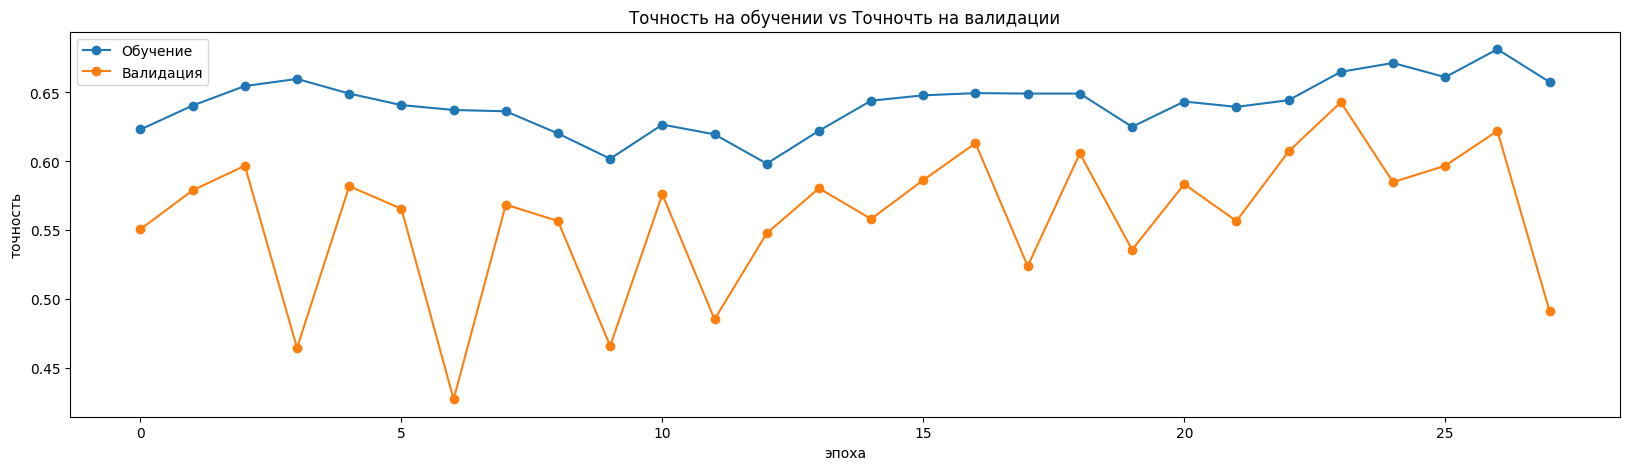

In [41]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(train_accs,'-o')
plt.plot(val_accs,'-o')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend(['Обучение','Валидация'])
plt.title('Точность на обучении vs Точночть на валидации')
plt.show()

In [42]:
model = torch.load('best-model.pt');
model.eval();

In [58]:
preds=[]
trgts=[]
with torch.no_grad():
  for data in tqdm(test_loader):
    inputs, targets=data[0].to(device),data[1].to(device)
    outputs=model(inputs)
    targets=targets.to('cpu').numpy()
    pred = outputs.max(1, keepdim=True)[1]
    pred = pred.to('cpu').numpy()
    trgts.append(targets)
    preds.append(pred)


100%|██████████| 42/42 [00:00<00:00, 1494.88it/s]


In [74]:
targets=[x for sub in trgts for x in sub]
predictions=[x[0] for sub in preds for x in sub]
targets=np.array(targets)
predictions=np.array(predictions)

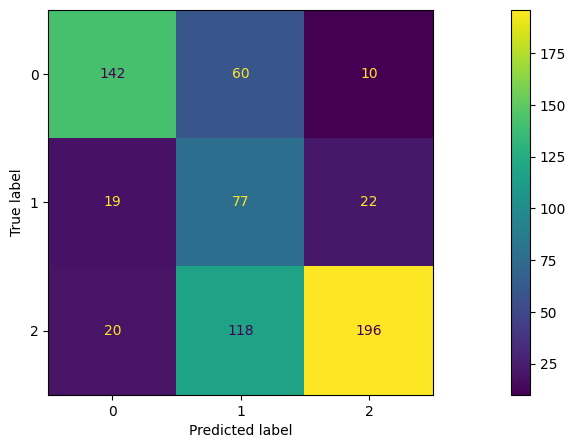

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
cm = confusion_matrix(targets, predictions)
ConfusionMatrixDisplay(cm).plot()

In [78]:
f1_score(targets, predictions,average='micro')

0.625